In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Importing

In [2]:
import yfinance as yf

# Define ticker and data range
ticker='MSFT'
start='2008-12-12'
end='2025-10-4'

df=yf.download(ticker,start,end)
df.head()

/tmp/ipython-input-700716151.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker,start,end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2008-12-12,14.163344,14.521817,13.680503,14.009712,78112600
2008-12-15,13.929241,14.221872,13.819503,14.148714,59925900
2008-12-16,14.712029,14.763240,13.899978,14.053608,97688700
2008-12-17,14.382821,14.668136,14.265769,14.492557,78922700
2008-12-18,14.119453,14.646190,13.892665,14.529138,80759200


# 2. Data Preprocessing

In [3]:
df.columns=['Close','High','Low','Open','Volume']
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2008-12-12,14.163344,14.521817,13.680503,14.009712,78112600
2008-12-15,13.929241,14.221872,13.819503,14.148714,59925900
2008-12-16,14.712029,14.763240,13.899978,14.053608,97688700
2008-12-17,14.382821,14.668136,14.265769,14.492557,78922700
2008-12-18,14.119453,14.646190,13.892665,14.529138,80759200


In [4]:
df=df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2008-12-12,14.163344,14.521817,13.680503,14.009712,78112600
1,2008-12-15,13.929241,14.221872,13.819503,14.148714,59925900
2,2008-12-16,14.712029,14.763240,13.899978,14.053608,97688700
3,2008-12-17,14.382821,14.668136,14.265769,14.492557,78922700
4,2008-12-18,14.119453,14.646190,13.892665,14.529138,80759200


In [5]:
df=df.drop(['Date'],axis=1)
df.head()

,Close,High,Low,Open,Volume
0,14.163344,14.521817,13.680503,14.009712,78112600
1,13.929241,14.221872,13.819503,14.148714,59925900
2,14.712029,14.763240,13.899978,14.053608,97688700
3,14.382821,14.668136,14.265769,14.492557,78922700
4,14.119453,14.646190,13.892665,14.529138,80759200


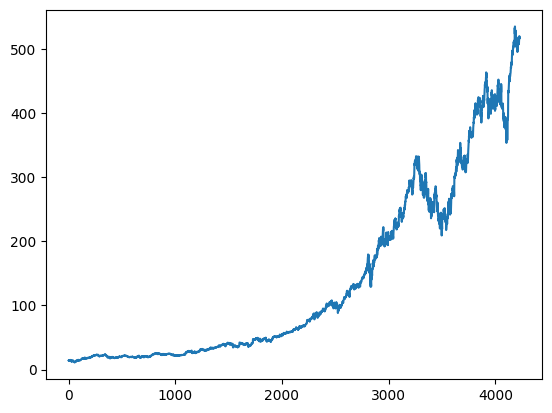

In [6]:
plt.plot(df['Close'])

# 3. Feature Engineering

In [7]:
ma100=df.rolling(100).mean()
ma200=df.rolling(200).mean()

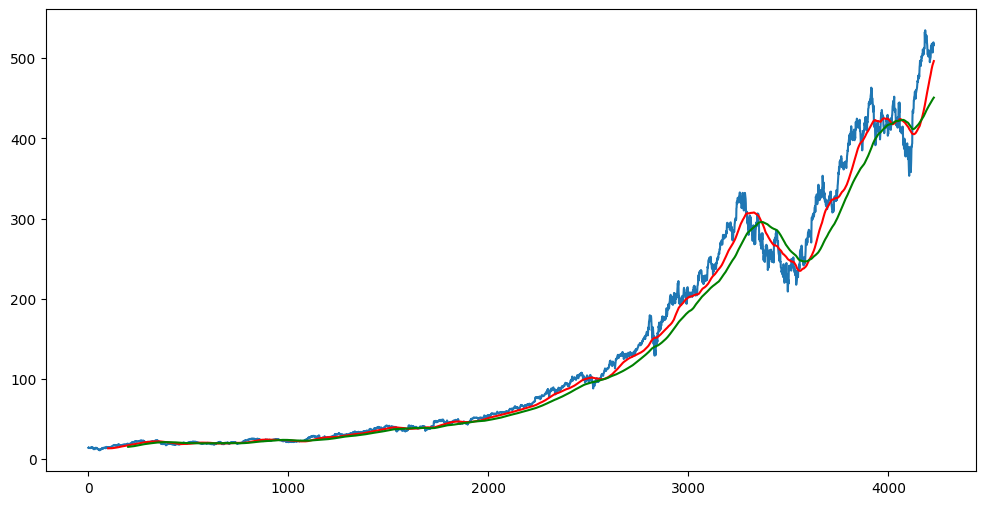

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100['Close'],color='r')
plt.plot(ma200['Close'],color='g')

In [9]:
df.shape

(4228, 5)

In [10]:
training_data=df['Close'][:int(len(df)*0.7)]
testing_data=df['Close'][int(len(df)*0.7):]

training_data.shape,testing_data.shape

((2959,), (1269,))

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [12]:
transformed_training_data=scaler.fit_transform(np.array(training_data).reshape(-1,1))
transformed_testing_data=scaler.fit_transform(np.array(testing_data).reshape(-1,1))

In [13]:
x_train=[]
y_train=[]
for i in range(100,transformed_training_data.shape[0]):
  x_train.append(transformed_training_data[i-100:i])
  y_train.append(transformed_training_data[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

# 4. Model Building

In [48]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,Dropout

model=Sequential([
    GRU(60,return_sequences=True,input_shape=(x_train.shape[1],1)),
    Dropout(0.2),
    GRU(60),
    Dropout(0.3),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 100, 60)        │        11,340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 60)             │        21,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,361 (130.32 KB)

 Trainable params: 33,361 (130.32 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='adam',loss='mean_squared_error')
history=model.fit(x_train,y_train,epochs=25,batch_size=32,validation_split=0.15)

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0077 - val_loss: 3.7852e-04
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.0312e-04 - val_loss: 6.0583e-04
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 3.9679e-04 - val_loss: 9.9158e-04
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 3.4742e-04 - val_loss: 4.4688e-04
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.3611e-04 - val_loss: 3.5981e-04
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.9194e-04 - val_loss: 6.2266e-04
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.7593e-04 - val_loss: 3.5776e-04
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4796e-04 - val_loss: 3.9220e-04
Epoch 9/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.6138e-04 - val_loss: 5.6906e-04
Epoch 10/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.6597e-04 - val_loss: 5.0731e-04
Epoch 11/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.3838e-04 - 

In [51]:
model1=Sequential([
    GRU(60,return_sequences=True,input_shape=(x_train.shape[1],1)),
    Dropout(0.2),
    GRU(60),
    Dropout(0.3),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
model1.compile(optimizer='adam',loss='mean_squared_error')
history1=model1.fit(x_train,y_train,epochs=25,batch_size=32,validation_split=0.15,callbacks=[early_stopping])

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0040 - val_loss: 7.3469e-04
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2887e-04 - val_loss: 3.4391e-04
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.7478e-04 - val_loss: 3.4812e-04
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9402e-04 - val_loss: 3.3532e-04
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2861e-04 - val_loss: 5.1233e-04
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.9995e-04 - val_loss: 9.3229e-04
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.5399e-04 - val_loss: 4.3993e-04
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.7070e-04 - val_loss: 7.9691e-04
Epoch 9/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.1751e-04 - val_loss: 7.2633e-04


In [53]:
model2=Sequential([
    GRU(60,return_sequences=True,input_shape=(x_train.shape[1],1)),
    Dropout(0.2),
    GRU(60),
    Dropout(0.3),
    Dense(1)
])

In [54]:

from keras.callbacks import EarlyStopping,ReduceLROnPlateau
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.25)
model2.compile(optimizer='adam',loss='mean_squared_error')
history2=model2.fit(x_train,y_train,epochs=25,batch_size=32,validation_split=0.15,callbacks=[early_stopping,reduce_lr])

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0049 - val_loss: 3.7724e-04 - learning_rate: 0.0010
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.5141e-04 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.6787e-04 - val_loss: 4.4933e-04 - learning_rate: 0.0010
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.3734e-04 - val_loss: 6.7770e-04 - learning_rate: 0.0010
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7678e-04 - val_loss: 3.5123e-04 - learning_rate: 2.5000e-04
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.8366e-04 - val_loss: 4.0582e-04 - learning_rate: 2.5000e-04
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.4910e-04 - val_loss: 3.5262e-04 - learning_rate: 2.5000e-04
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.9180e-04 - val_loss: 4.3074e-04 - learning_rate: 6.2500e-05
Epoch 9/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - los

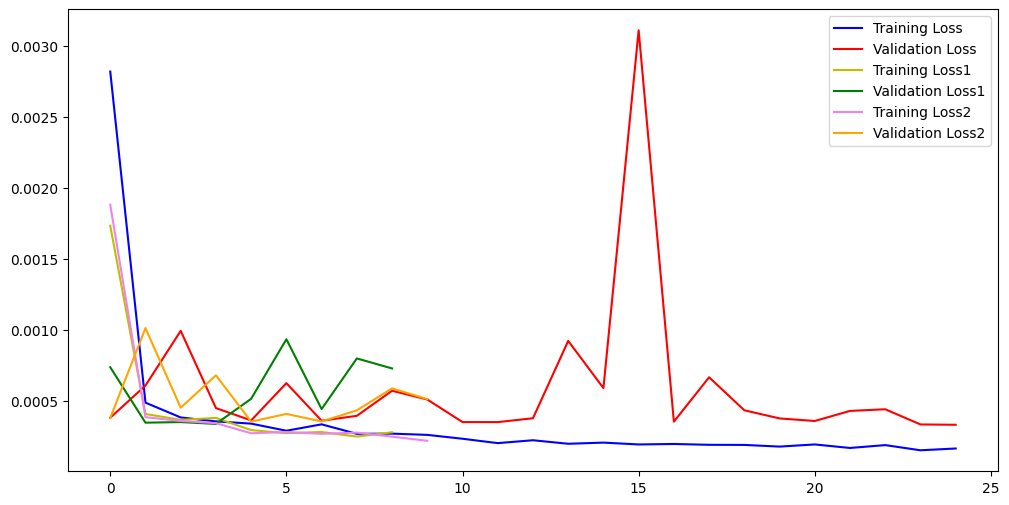

In [55]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'],label='Training Loss',color='b')
plt.plot(history.history['val_loss'],label='Validation Loss',color='r')

plt.plot(history1.history['loss'],label='Training Loss1',color='y')
plt.plot(history1.history['val_loss'],label='Validation Loss1',color='g')

plt.plot(history2.history['loss'],label='Training Loss2',color='violet')
plt.plot(history2.history['val_loss'],label='Validation Loss2',color='orange')
plt.legend()

# Experimenting with Bidirectional LSTM

In [56]:
from keras.layers import Bidirectional
model3=Sequential([
    Bidirectional(GRU(60,return_sequences=True,input_shape=(x_train.shape[1],1))),
    Dropout(0.2),
    Bidirectional(GRU(60)),
    Dropout(0.3),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
model3.compile(optimizer='adam',loss='mean_squared_error')
history3=model3.fit(x_train,y_train,epochs=25,batch_size=32,validation_split=0.15)

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 3.1403e-04 - val_loss: 0.0022
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.4585e-04 - val_loss: 6.6747e-04
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 3.4074e-04 - val_loss: 0.0013
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4204e-04 - val_loss: 0.0011
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.2161e-04 - val_loss: 5.2316e-04
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.3739e-04 - val_loss: 0.0012
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.6994e-04 - val_loss: 4.5163e-04
Epoch 9/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.8819e-04 - val_loss: 4.2619e-04
Epoch 10/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.8039e-04 - val_loss: 0.0020
Epoch 11/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.9426e-04 - val_loss: 7.0388e-04
Epo

In [58]:
model4=Sequential([
    Bidirectional(GRU(60,return_sequences=True,input_shape=(x_train.shape[1],1))),
    Dropout(0.2),
    Bidirectional(GRU(60)),
    Dropout(0.3),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
model4.compile(optimizer='adam',loss='mean_squared_error')
history4=model4.fit(x_train,y_train,epochs=25,batch_size=32,validation_split=0.15,callbacks=[early_stopping,reduce_lr])

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0056 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.3837e-04 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.7170e-04 - val_loss: 7.8812e-04 - learning_rate: 0.0010
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2.5099e-04 - val_loss: 7.6309e-04 - learning_rate: 0.0010
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.9720e-04 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.1539e-04 - val_loss: 5.0941e-04 - learning_rate: 0.0010
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.9395e-04 - val_loss: 5.0717e-04 - learning_rate: 0.0010
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.1308e-04 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 9/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.9275e-04 - val_loss: 9.

In [60]:
model5=Sequential([
    Bidirectional(GRU(60,return_sequences=True,input_shape=(x_train.shape[1],1))),
    Dropout(0.2),
    Bidirectional(GRU(60)),
    Dropout(0.3),
    Dense(1)
])

In [61]:
model5.compile(optimizer='adam',loss='mean_squared_error')
history5=model5.fit(x_train,y_train,epochs=25,batch_size=32,validation_split=0.15,callbacks=[early_stopping])

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0047 - val_loss: 0.0011
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.0670e-04 - val_loss: 7.7321e-04
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.8233e-04 - val_loss: 8.2709e-04
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.7907e-04 - val_loss: 6.9209e-04
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.1784e-04 - val_loss: 5.3169e-04
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.7907e-04 - val_loss: 0.0015
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.1056e-04 - val_loss: 7.9791e-04
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.1869e-04 - val_loss: 4.6832e-04
Epoch 9/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.7483e-04 - val_loss: 0.0011
Epoch 10/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.9020e-04 - val_loss: 0.0017
Epoch 11/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.8536e-04 - val_loss: 0.0013

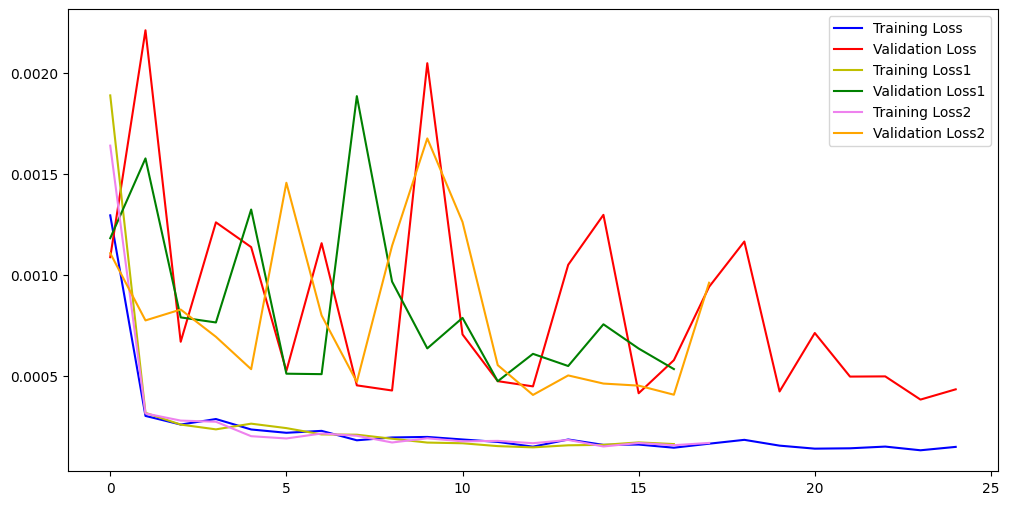

In [62]:
plt.figure(figsize=(12,6))
plt.plot(history3.history['loss'],label='Training Loss',color='b')
plt.plot(history3.history['val_loss'],label='Validation Loss',color='r')

plt.plot(history4.history['loss'],label='Training Loss1',color='y')
plt.plot(history4.history['val_loss'],label='Validation Loss1',color='g')

plt.plot(history5.history['loss'],label='Training Loss2',color='violet')
plt.plot(history5.history['val_loss'],label='Validation Loss2',color='orange')
plt.legend()

# 5. Prediction

In [63]:
last_100_days=training_data.tail(100)
final_testing_df=pd.concat([last_100_days,testing_data])

In [64]:
input_data=scaler.fit_transform(np.array(final_testing_df).reshape(-1,1))
input_data

array([[0.01212839],
       [0.01084919],
       [0.        ],
       ...,
       [0.95962595],
       [0.94897634],
       [0.95329513]])

In [65]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)

In [66]:
# making predictions
y_predicted=model.predict(x_test)
y_predicted1=model1.predict(x_test)
y_predicted2=model2.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [67]:
scaler.scale_

array([0.0026825])

In [68]:
scale_factor=1/scaler.scale_[0]
y_predicted=y_predicted*scale_factor
y_predicted1=y_predicted1*scale_factor
y_predicted2=y_predicted2*scale_factor
y_test=y_test*scale_factor

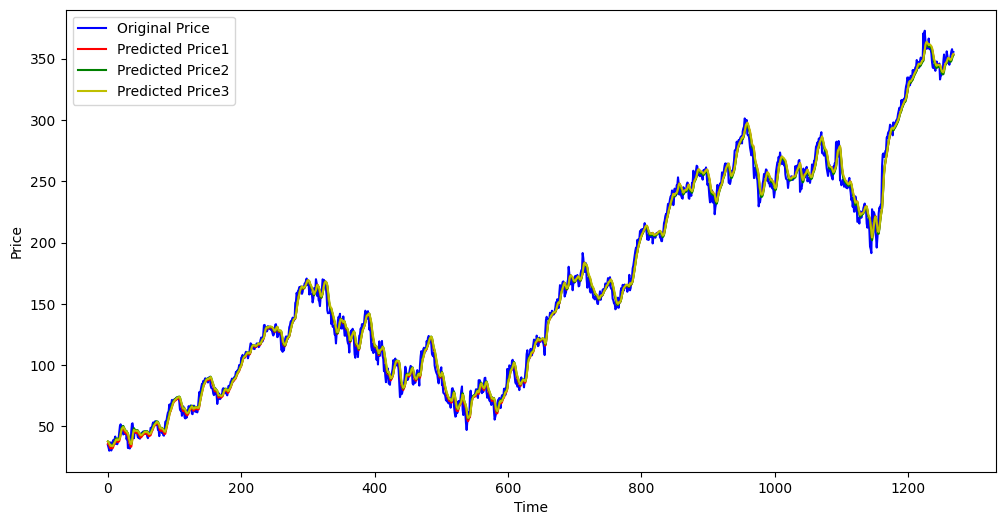

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price1')
plt.plot(y_predicted1,'g',label='Predicted Price2')
plt.plot(y_predicted2,'y',label='Predicted Price3')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predicted),r2_score(y_test,y_predicted1),r2_score(y_test,y_predicted2)

(0.9938324726744693, 0.9936121292668583, 0.9931167482616747)

In [71]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error
print('MAE1:',mean_absolute_error(y_test,y_predicted))
print('RMSE1:',root_mean_squared_error(y_test,y_predicted))
print('MAE2:',mean_absolute_error(y_test,y_predicted1))
print('RMSE2:',root_mean_squared_error(y_test,y_predicted1))
print('MAE3:',mean_absolute_error(y_test,y_predicted2))
print('RMSE3:',root_mean_squared_error(y_test,y_predicted2))

MAE1: 5.267451810410872
RMSE1: 6.8481683003209115
MAE2: 5.369546887170036
RMSE2: 6.969424911393188
MAE3: 5.561921977446264
RMSE3: 7.234619762743135


# for Bidirectional

In [72]:
y_predicted3=model3.predict(x_test)
y_predicted4=model4.predict(x_test)
y_predicted5=model5.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [73]:
scaler.scale_

array([0.0026825])

In [74]:
scale_factor=1/scaler.scale_[0]
y_predicted3=y_predicted3*scale_factor
y_predicted4=y_predicted4*scale_factor
y_predicted5=y_predicted5*scale_factor

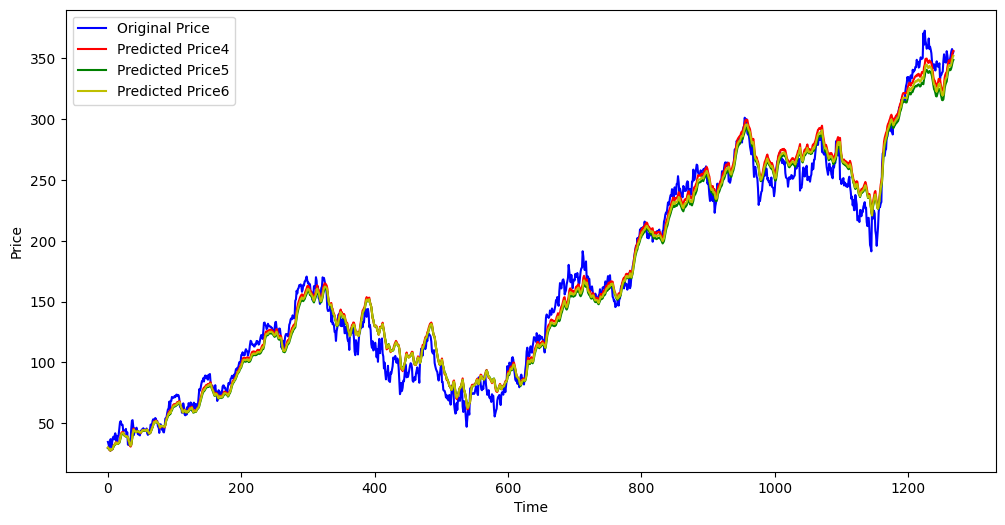

In [75]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted3,'r',label='Predicted Price4')
plt.plot(y_predicted4,'g',label='Predicted Price5')
plt.plot(y_predicted5,'y',label='Predicted Price6')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

In [76]:
r2_score(y_test,y_predicted3),r2_score(y_test,y_predicted4),r2_score(y_test,y_predicted5)

(0.9834808366268842, 0.9811998589927587, 0.9829334885244984)

In [77]:
print('MAE4:',mean_absolute_error(y_test,y_predicted3))
print('RMSE4:',root_mean_squared_error(y_test,y_predicted3))
print('MAE5:',mean_absolute_error(y_test,y_predicted4))
print('RMSE5:',root_mean_squared_error(y_test,y_predicted4))
print('MAE6:',mean_absolute_error(y_test,y_predicted5))
print('RMSE6:',root_mean_squared_error(y_test,y_predicted5))

MAE4: 8.78620365718095
RMSE4: 11.20760736650185
MAE5: 9.688823923599767
RMSE5: 11.956372504401589
MAE6: 9.117273871010426
RMSE6: 11.391771427454733


# 6.Final Evaluation

In [78]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_predicted)*100,mean_absolute_percentage_error(y_test,y_predicted1)*100,mean_absolute_percentage_error(y_test,y_predicted2)*100

(4.091844416213066, 4.226850086325685, 4.377190618624774)

In [79]:
mean_absolute_percentage_error(y_test,y_predicted3)*100,mean_absolute_percentage_error(y_test,y_predicted4)*100,mean_absolute_percentage_error(y_test,y_predicted5)*100

(6.713776473089486, 7.326075457143562, 6.96046448331166)

In [ ]:
#model.save('stock_prediction_GRU.keras')